In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def l1_norm(u, u_ref):
    diff = numpy.sum(numpy.abs(u - u_ref))
    return diff

In [4]:
nx, ny = 41, 41
L = 1.0
dx = L / (nx - 1)
dy = L / (ny - 1)

x = numpy.linspace(0, L, num=nx)
y = numpy.linspace(0, L, num=ny)

In [5]:
p0 = numpy.zeros((ny, nx))
w0 = numpy.zeros((ny, nx))
w0[-1, :] = -3 / dy

In [6]:
def Stokes_2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    w = w0.copy()
    p = w.copy()
    diff = rtol + 1.0
    ite = 0
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        w[1:-1, 1:-1] = 0.25 * (w[1:-1, :-2] + w[1:-1, 2:] +
                                w[:-2, 1:-1] + w[2:, 1:-1])
        w[-1, 1:-1] = w[-2, 1:-1]
        w[-1, :] = (- 0.5 * dy**2) * (8 * p[-2, :] - p[-3, :]) - (3/dy)
        w[:, -1] = 0
        w[0, :] = 0
        w[:, 0] = 0
        
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] +
                                p[:-2, 1:-1] + p[2:, 1:-1] +
                                w[1:-1, 1:-1] * dx**2)
        p[-1, :] = 0
        p[:, -1] = 0
        p[0, :] = 0
        p[:, 0] = 0
        diff = l1_norm(p, pn)
        ite += 1
    return w, p, ite, diff

In [7]:
w, p, ite, diff = Stokes_2d_jacobi(p0, maxiter=20000, rtol=1e-6)

In [8]:
ite

5932

In [9]:
diff

9.994685780077839e-07

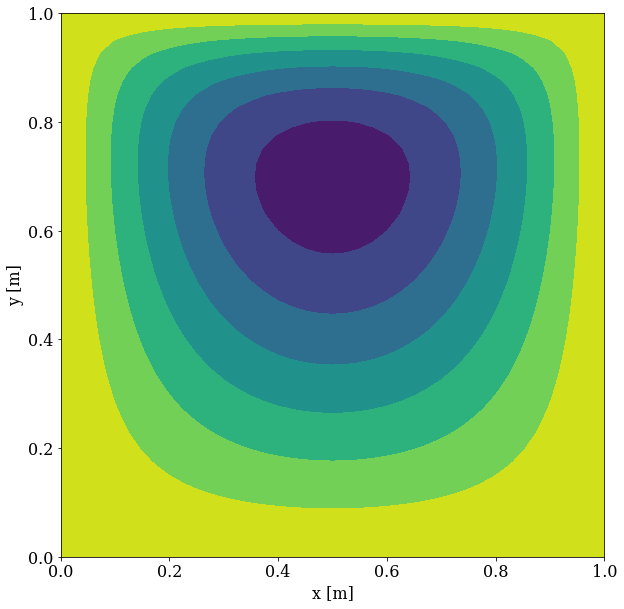

In [10]:
pyplot.figure(figsize=(10.0, 10.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
pyplot.contourf(x, y, p)
pyplot.axis('scaled', adjustable='box');

In [11]:
ind = numpy.unravel_index(abs(p).argmax(), p.shape)
print(p[ind])

-2.63711454574421


In [12]:
numpy.round(p[32,::8], 4)

array([ 0.    , -1.5416, -2.3226, -2.3226, -1.5416,  0.    ])